### <p style="text-align: center;">Climate Change Knowledge Portal <br/> Historical Data and Projections</p>
#### <p style="text-align: center;">DSC540 – Data Preparation <br/> Term Project - Milestone 2 <br/> Winter 2020 <br/> Manish Kalkar</p>
### <p style="text-align: center;">Cleaning / Formatting Flat File Source</p>

### Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Input File and display content

In [2]:
avg_temp_df = pd.read_csv("tas_1901_2016_USA.csv")
avg_temp_df.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-5.71120,1901,Jan Average,United States,USA
1,-6.55770,1901,Feb Average,United States,USA
2,-0.00450,1901,Mar Average,United States,USA
3,4.78677,1901,Apr Average,United States,USA
4,12.08400,1901,May Average,United States,USA
5,16.93490,1901,Jun Average,United States,USA
6,20.84160,1901,Jul Average,United States,USA
7,19.09190,1901,Aug Average,United States,USA
8,13.91670,1901,Sep Average,United States,USA
9,8.83625,1901,Oct Average,United States,USA


### Display Column Names

In [3]:
avg_temp_df.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

### Remove White Spaces within column names

In [4]:
avg_temp_df = avg_temp_df.rename(columns={' Year': 'Year'})
avg_temp_df = avg_temp_df.rename(columns={' Statistics': 'Statistics'})
avg_temp_df = avg_temp_df.rename(columns={' Country': 'Country'})
avg_temp_df = avg_temp_df.rename(columns={' ISO3': 'ISO3'})

In [5]:
avg_temp_df.columns

Index(['Temperature - (Celsius)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')

### Delete column Country - Column not needed due to redundant data - Country Name = United States 

In [6]:
avg_temp_df.drop('Country', axis=1, inplace=True)
avg_temp_df.head(12)

,Temperature - (Celsius),Year,Statistics,ISO3
0,-5.71120,1901,Jan Average,USA
1,-6.55770,1901,Feb Average,USA
2,-0.00450,1901,Mar Average,USA
3,4.78677,1901,Apr Average,USA
4,12.08400,1901,May Average,USA
5,16.93490,1901,Jun Average,USA
6,20.84160,1901,Jul Average,USA
7,19.09190,1901,Aug Average,USA
8,13.91670,1901,Sep Average,USA
9,8.83625,1901,Oct Average,USA


### Replace Headers

In [7]:
avg_temp_df = avg_temp_df.rename(columns={'Temperature - (Celsius)': 'Average_Temperature_Deg_C'})
avg_temp_df = avg_temp_df.rename(columns={'Statistics': 'Month'})
avg_temp_df = avg_temp_df.rename(columns={'ISO3': 'Country'})

In [8]:
avg_temp_df.head(12)

,Average_Temperature_Deg_C,Year,Month,Country
0,-5.71120,1901,Jan Average,USA
1,-6.55770,1901,Feb Average,USA
2,-0.00450,1901,Mar Average,USA
3,4.78677,1901,Apr Average,USA
4,12.08400,1901,May Average,USA
5,16.93490,1901,Jun Average,USA
6,20.84160,1901,Jul Average,USA
7,19.09190,1901,Aug Average,USA
8,13.91670,1901,Sep Average,USA
9,8.83625,1901,Oct Average,USA


### Format data

#### Get rid of White Spaces in the data within Month and Country columns

In [9]:
avg_temp_df["Month"] = avg_temp_df["Month"].str.strip()
avg_temp_df["Country"] = avg_temp_df["Country"].str.strip()

#### Ger rid of redundant data - Keyword "Average" in column Month

In [10]:
avg_temp_df.replace(to_replace = "Jan Average", value = "January", inplace = True)
avg_temp_df.replace(to_replace = "Feb Average", value = "February", inplace = True)
avg_temp_df.replace(to_replace = "Mar Average", value = "March", inplace = True)
avg_temp_df.replace(to_replace = "Apr Average", value = "April", inplace = True)
avg_temp_df.replace(to_replace = "May Average", value = "May", inplace = True)
avg_temp_df.replace(to_replace = "Jun Average", value = "June", inplace = True)
avg_temp_df.replace(to_replace = "Jul Average", value = "July", inplace = True)
avg_temp_df.replace(to_replace = "Aug Average", value = "August", inplace = True)
avg_temp_df.replace(to_replace = "Sep Average", value = "September", inplace = True)
avg_temp_df.replace(to_replace = "Oct Average", value = "October", inplace = True)
avg_temp_df.replace(to_replace = "Nov Average", value = "November", inplace = True)
avg_temp_df.replace(to_replace = "Dec Average", value = "December", inplace = True)
avg_temp_df.head(12)

,Average_Temperature_Deg_C,Year,Month,Country
0,-5.71120,1901,January,USA
1,-6.55770,1901,February,USA
2,-0.00450,1901,March,USA
3,4.78677,1901,April,USA
4,12.08400,1901,May,USA
5,16.93490,1901,June,USA
6,20.84160,1901,July,USA
7,19.09190,1901,August,USA
8,13.91670,1901,September,USA
9,8.83625,1901,October,USA


### Check for duplicates

In [11]:
print("Average Temperature is duplictaed - {}".format(any(avg_temp_df.Average_Temperature_Deg_C.duplicated())))
print("Year is duplictaed - {}".format(any(avg_temp_df.Year.duplicated())))
print("Month is duplictaed - {}".format(any(avg_temp_df.Month.duplicated())))
print("Country is duplictaed - {}".format(any(avg_temp_df.Country.duplicated())))

Average Temperature is duplictaed - True
Year is duplictaed - True
Month is duplictaed - True
Country is duplictaed - True


### Check for NaN values

In [12]:
print("The column Average Temperature contains NaN - %r " % avg_temp_df.Average_Temperature_Deg_C.isnull().values.any())
print("The column Year contains NaN - %r " % avg_temp_df.Year.isnull().values.any())
print("The column Month contains NaN - %r " % avg_temp_df.Month.isnull().values.any())
print("The column Country contains NaN - %r " % avg_temp_df.Country.isnull().values.any())

The column Average Temperature contains NaN - False 
The column Year contains NaN - False 
The column Month contains NaN - False 
The column Country contains NaN - False 


### Fix inconsistent values

#### Average Temperature column has inconsistent decimal places.

#### Round up Average Temperature Values to "Two" decimals

In [13]:
avg_temp_df["Average_Temperature_Deg_C"] = round(avg_temp_df.Average_Temperature_Deg_C, 2)
avg_temp_df.head(12)

,Average_Temperature_Deg_C,Year,Month,Country
0,-5.71,1901,January,USA
1,-6.56,1901,February,USA
2,-0.00,1901,March,USA
3,4.79,1901,April,USA
4,12.08,1901,May,USA
5,16.93,1901,June,USA
6,20.84,1901,July,USA
7,19.09,1901,August,USA
8,13.92,1901,September,USA
9,8.84,1901,October,USA


### Identify Outliers - Create a box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7a6a82b20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7a6a97220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7a6a827c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7a6a978e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7a6a97be0>],
 'means': []}

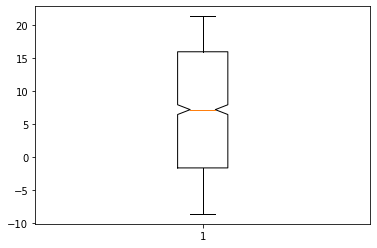

In [14]:
plt.boxplot(avg_temp_df.Average_Temperature_Deg_C, notch=True)

In [15]:
# Find maximum average temperature
avg_temp_df.Average_Temperature_Deg_C.max()

21.37

In [16]:
# Find minimum average temperature
avg_temp_df.Average_Temperature_Deg_C.min()

-8.58

#### Data in this column in the interval (-8.58 Deg C, 21.37 Deg C). However, the main concentration of the data is between -2 Deg C to 16 Deg C. Anything beyond 21 Deg C and bellow -8 Deg C are outliers.

### Report the size before getting rid of the outliers

In [17]:
avg_temp_df.shape

(1392, 4)

### Get rid of the outliers

In [18]:
avg_temp_minus_outliers_df = avg_temp_df[(avg_temp_df['Average_Temperature_Deg_C'] < 21) & (avg_temp_df['Average_Temperature_Deg_C'] > -8)]

### Report the size after getting rid of the outliers

In [19]:
avg_temp_minus_outliers_df.shape

(1380, 4)

### Export Dataframe into Output csv File

In [20]:
avg_temp_minus_outliers_df.to_csv('Average_Temperatures_1901_2016_USA.csv', index=False)